# BDDA-1 Project_1

**By group-2**

-Prabhleen Kaur Pahwa (035039)

-Janessa Karra (035028)

-Tanmay Agrarwal (035058)

#### About the Dataset

The Dataset is from the organisation, Accelerating Medicines Partnership® Parkinson's Disease (AMP®PD) hosting the competition on Kaggle, is a collaborative initiative involving government entities, industry partners, and nonprofit organizations. 


**Objective**: To identify and validate biomarkers that can diagnose the disease, predict its progression, or provide insights into disease development.

**About Parkinson Disease**

Parkinson's disease (PD) is a debilitating neurological disorder that affects various aspects of a person's life, including movement, cognitive function, sleep, and more. Unfortunately, there is currently no cure for PD, and its symptoms tend to worsen as time goes on. Projections suggest that by the year 2037, around 1.6 million individuals in the United States will be living with Parkinson's disease, leading to a significant economic burden of approximately $80 billion. Research indicates that irregularities in proteins and peptides are significant factors contributing to the onset and progression of this condition. By leveraging the power of data science, gaining a deeper understanding of these irregularities could offer crucial insights for the development of novel pharmacotherapies aimed at slowing down the disease's advancement or even finding a cure.

Efforts thus far have yielded a vast amount of complex clinical and neurobiological data from more than 10,000 subjects, which is being made widely available to the research community. Although important discoveries have been made using this data, definitive biomarkers or treatments for Parkinson's disease remain elusive.

#### DEPENDENCIES

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
# 0.0
# For skopt routines
! pip install scikit-optimize

# 0.1 For plotting skopt results
! pip install 'scikit-optimize[plots]'
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error

ERROR: Invalid requirement: "'scikit-optimize[plots]'"


In [3]:
# 1.0 Clear ipython memory
#%reset -f

# 1.1 Data manipulation and plotting modules
import numpy as np
import pandas as pd


# 1.2 Data pre-processing
#     z = (x-mean)/stdev
from sklearn.preprocessing import StandardScaler as ss

# 1.3 Dimensionality reduction and noise removal
from sklearn.decomposition import PCA

# 1.4 Data splitting and model parameter search
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# 1.5 Model pipelining
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# 1.6 Hyperparameter optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# 1.7.1
#     pip install scikit-optimize
#     pip install 'scikit-optimize[plots]'
#     Refer: https://github.com/scikit-optimize/scikit-optimize
#     conda install -c conda-forge scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# 1.8 Modeling modules
#     Call sklearn wrapper of xgboost
# """Scikit-Learn Wrapper interface for XGBoost."""
#  """Implementation of the Scikit-Learn API for XGBoost.
# https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn
# Stackoverflow:
# https://stackoverflow.com/a/34696477
# https://stackoverflow.com/a/46947191
# Install as: conda install -c anaconda py-xgboost
from xgboost.sklearn import XGBClassifier

In [4]:
# 1.9 Model evaluation metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

# 1.10
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance

# 1.11 Permutation feature importance
from sklearn.inspection import permutation_importance

In [5]:
# 1.12 Misc
import time
import os
import gc
import random

# 1.13 Used in Randomized parameter search
from scipy.stats import uniform

In [6]:
# 1.14
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
# 1.15 Set option to dislay many rows
pd.set_option('display.max_columns', 100)

#### LOADING THE DATASETS

In [8]:
# Load a dataset into a Pandas DataFrame
train_proteins = pd.read_csv(r"C:\Users\Prabhleen Kaur Pahwa\Documents\1_FORE\Term 3\MLP\Parkinson\train_proteins.csv")
train_peptides = pd.read_csv(r"C:\Users\Prabhleen Kaur Pahwa\Documents\1_FORE\Term 3\MLP\Parkinson\train_peptides.csv")
train_clinical = pd.read_csv(r"C:\Users\Prabhleen Kaur Pahwa\Documents\1_FORE\Term 3\MLP\Parkinson\train_clinical_data.csv")

#### READING THE DATASETS

In [9]:
print('clinical dataset shape:  ', train_clinical.shape)
train_clinical.head()
train_proteins.head()
train_peptides.head()

clinical dataset shape:   (2615, 8)


,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On


,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0
2,55_0,0,55,O00584,39585.8
3,55_0,0,55,O14498,41526.9
4,55_0,0,55,O14773,31238.0


,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.3
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.0
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.0
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.7


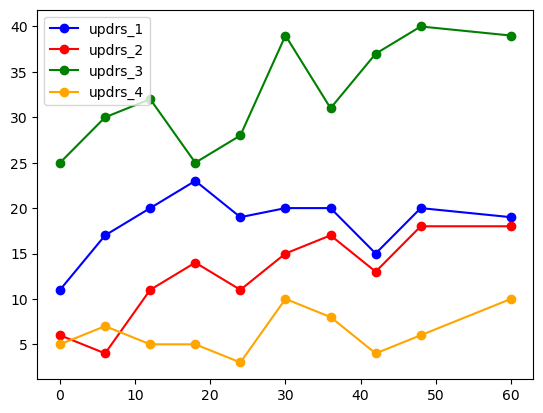

In [10]:
# Fetch data for patient with id 1517
plot_df = train_clinical[train_clinical["patient_id"]==1517]
fig, ax = plt.subplots(1, 1)

ax.plot(plot_df['visit_month'], plot_df['updrs_1'], marker='o', color="blue", label="updrs_1", linestyle="-")
ax.plot(plot_df['visit_month'], plot_df['updrs_2'], marker='o', color="red", label="updrs_2", linestyle="-")
ax.plot(plot_df['visit_month'], plot_df['updrs_3'], marker='o', color="green", label="updrs_3", linestyle="-")
ax.plot(plot_df['visit_month'], plot_df['updrs_4'], marker='o', color="orange", label="updrs_4", linestyle="-")

ax.legend()
plt.show()

Text(0.5, 0.98, 'UPDRS value distributions')

Text(0.5, 1.0, 'UPDRS_1')

Text(0.5, 1.0, 'UPDRS_2')

Text(0.5, 1.0, 'UPDRS_3')

Text(0.5, 1.0, 'UPDRS_4')

Text(0.5, 0, 'Score')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'UPDRS_1')

Text(0.5, 0, 'Score')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'UPDRS_2')

Text(0.5, 0, 'Score')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'UPDRS_3')

Text(0.5, 0, 'Score')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'UPDRS_4')

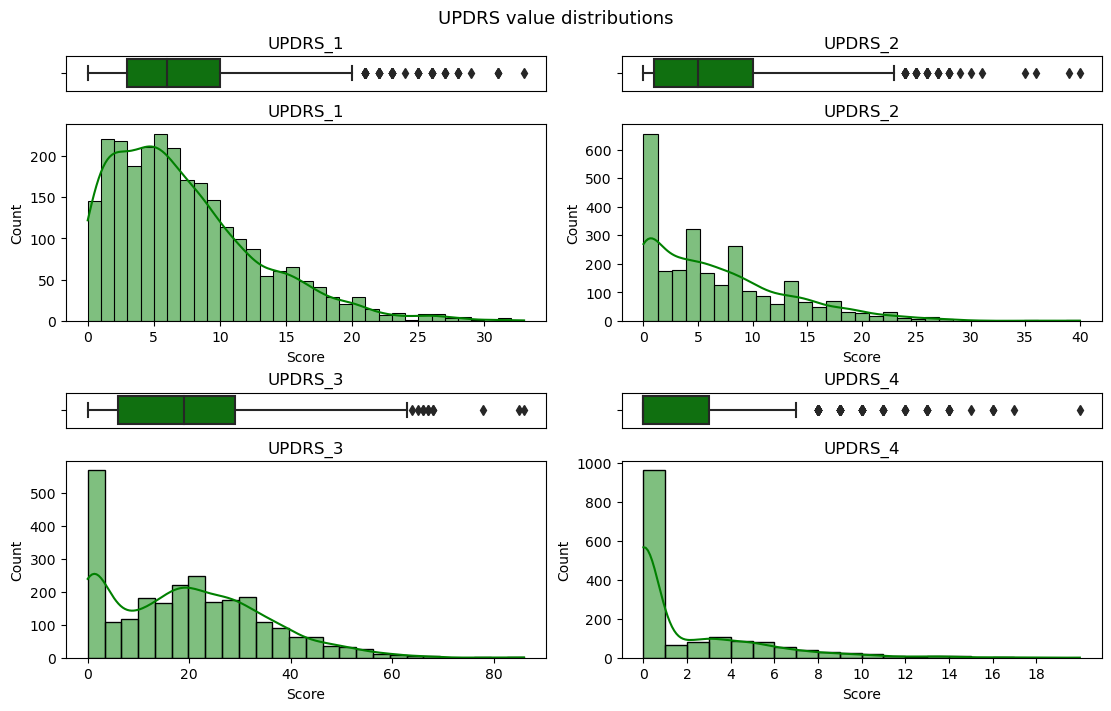

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["green", "yellow", "orange"]
sns.set_palette(sns.color_palette(colors))

f, axes = plt.subplots(4, 2, layout="constrained",
                        gridspec_kw={"height_ratios": (.15, .85, .15, .85)}, figsize=(11, 7))

f.suptitle('UPDRS value distributions', fontsize=13)

splot = sns.boxplot(ax=axes[0][0], x=train_clinical['updrs_1'])
splot.axes.get_xaxis().set_visible(False)
splot.set_title('UPDRS_1')

splot = sns.boxplot(ax=axes[0][1], x=train_clinical['updrs_2'])
splot.axes.get_xaxis().set_visible(False)
splot.set_title('UPDRS_2')
splot = sns.boxplot(ax=axes[2][0], x=train_clinical['updrs_3'])
splot.axes.get_xaxis().set_visible(False)
splot.set_title('UPDRS_3')

splot = sns.boxplot(ax=axes[2][1], x=train_clinical['updrs_4'])
splot.axes.get_xaxis().set_visible(False)
splot.set_title('UPDRS_4')

splot = sns.histplot(ax=axes[1][0], x=train_clinical['updrs_1'], kde=True, alpha=0.5, ec='black')
splot.set_xlabel('Score')
splot.set_ylabel('Count')
splot.set_title('UPDRS_1')

splot = sns.histplot(ax=axes[1][1], x=train_clinical['updrs_2'], kde=True, alpha=0.5, ec='black')
splot.set_xlabel('Score')
splot.set_ylabel('Count')
splot.set_title('UPDRS_2')

splot = sns.histplot(ax=axes[3][0], x=train_clinical['updrs_3'], kde=True, alpha=0.5, ec='black')
splot.set_xlabel('Score')
splot.set_ylabel('Count')
splot.set_title('UPDRS_3')

splot = sns.histplot(ax=axes[3][1], x=train_clinical['updrs_4'], kde=True, bins=range(0, 20), alpha=0.5, ec='black')
splot.set_xticks(range(0, 20, 2))
splot.set_xlabel('Score')
splot.set_ylabel('Count')
splot.set_title('UPDRS_4')


plt.show()

#### UNDERSTANDING THE  VARIABLES

**train_peptides: Mass spectrometry data at the peptide level. Peptides are the component subunits of proteins.**

visit_id - ID code for the visit.

visit_month - The month of the visit, relative to the first visit by the patient.

patient_id - An ID code for the patient.

UniProt - The UniProt ID code for the associated protein. There are often several peptides per protein.

Peptide - The sequence of amino acids included in the peptide. See this table for the relevant codes. Some rare annotations may not be included in the table. The test set may include peptides not found in the train set.

PeptideAbundance - The frequency of the amino acid in the sample.


**train_proteins: Protein expression frequencies aggregated from the peptide level data.**

visit_id - ID code for the visit.

visit_month - The month of the visit, relative to the first visit by the patient.

patient_id - An ID code for the patient.

UniProt - The UniProt ID code for the associated protein. There are often several peptides per protein. The test set may include proteins not found in the train set.

NPX - Normalized protein expression. The frequency of the protein's occurrence in the sample. May not have a 1:1 relationship with the component peptides as some proteins contain repeated copies of a given peptide.


**train_clinical_data.csv**

visit_id - ID code for the visit.

visit_month - The month of the visit, relative to the first visit by the patient.

patient_id - An ID code for the patient.

updrs_[1-4] - The patient's score for part N of the Unified Parkinson's Disease Rating Scale. Higher numbers indicate more severe symptoms. Each sub-section covers a distinct category of symptoms, such as mood and behavior for Part 1 and motor functions for Part 3.

upd23b_clinical_state_on_medication - Whether or not the patient was taking medication such as Levodopa during the UPDRS assessment. Expected to mainly affect the scores for Part 3 (motor function). These medications wear off fairly quickly (on the order of one day) so it's common for patients to take the motor function exam twice in a single month, both with and without medication.

#### IDENTIFYING THE MISSING VALUES

In [84]:
train_clinical.isna().sum()
train_proteins.isna().sum()
train_peptides.isna().sum()

visit_id                                  0
patient_id                                0
visit_month                               0
updrs_1                                   1
updrs_2                                   2
updrs_3                                  25
updrs_4                                1038
upd23b_clinical_state_on_medication    1327
dtype: int64

visit_id       0
visit_month    0
patient_id     0
UniProt        0
NPX            0
dtype: int64

visit_id            0
visit_month         0
patient_id          0
UniProt             0
Peptide             0
PeptideAbundance    0
dtype: int64

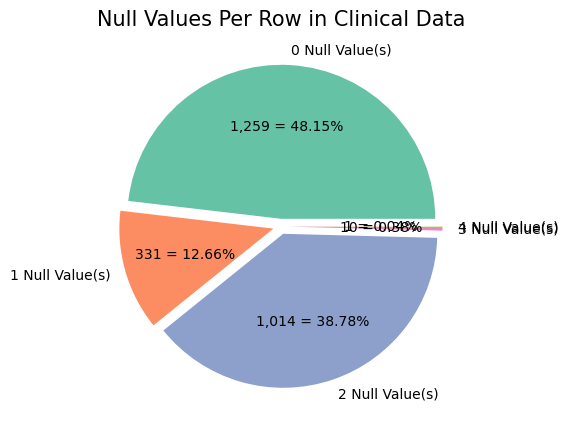

In [12]:
train_clinical["null_count"] = train_clinical.isnull().sum(axis=1)
count_train_clin = train_clinical.groupby("null_count")["visit_id"].count().to_dict()
null_train_clin = {"{} Null Value(s)".format(k): v for k, v in count_train_clin.items()}

fig, ax = plt.subplots(figsize=(5, 5))

_ = ax.pie(
    x=list(null_train_clin.values()),
    autopct=lambda x: "{:,.0f} = {:.2f}%".format(x * sum(null_train_clin.values()) / 100, x),
    explode=[0.05] * len(null_train_clin.keys()),
    labels=null_train_clin.keys(),
    colors=sns.color_palette("Set2")[0:len(null_train_clin.keys())],
)
_ = ax.set_title("Null Values Per Row in Clinical Data", fontsize=15)

#### MERGING THE DATASET AS PER THE REQUIREMENT

In [85]:
merged_data = pd.merge(train_clinical, train_proteins, on=["visit_id", "visit_month", "patient_id"])
merged_data.head()
merged_data.shape

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,UniProt,NPX
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN,O00391,11254.3
1,55_0,55,0,10.0,6.0,15.0,NaN,NaN,O00533,732430.0
2,55_0,55,0,10.0,6.0,15.0,NaN,NaN,O00584,39585.8
3,55_0,55,0,10.0,6.0,15.0,NaN,NaN,O14498,41526.9
4,55_0,55,0,10.0,6.0,15.0,NaN,NaN,O14773,31238.0


(223268, 10)

In [175]:
columns_to_drop = ['visit_id', 'patient_id']
merged_data_1=merged_data.drop(columns=columns_to_drop)
merged_data_1

,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,UniProt,NPX
126912,12,4.0,0.0,0.0,0.0,1.0,108,75013.00
123724,12,11.0,5.0,18.0,0.0,1.0,73,576816.00
53658,0,2.0,0.0,1.0,NaN,1.0,150,51416.90
74012,24,11.0,13.0,39.0,0.0,0.0,18,91722.80
3921,48,6.0,0.0,0.0,NaN,1.0,35,9155.16
...,...,...,...,...,...,...,...,...
22493,60,7.0,3.0,39.0,3.0,0.0,168,9994.49
47250,24,8.0,6.0,24.0,8.0,0.0,116,547400.00
119213,12,28.0,4.0,15.0,NaN,1.0,12,60992.00
193229,12,13.0,20.0,47.0,NaN,0.0,185,15715.90


In [176]:
total_lines = 223268
num_lines = 0.4 * total_lines    # 40% of data


# 2.4 Read randomly 'p' fraction of files
#     Ref: https://stackoverflow.com/a/48589768

p = num_lines/total_lines  # fraction of lines to read (40%)

In [178]:
import numpy as np

# Define the fraction of data to sample
fraction_to_sample = 0.4

# Calculate the number of rows to sample
num_rows_to_sample = int(len(merged_data_1) * fraction_to_sample)

# Use numpy to randomly sample rows
sampled_data = merged_data_1.sample(n=num_rows_to_sample, random_state=42)  # Set random_state for reproducibility

# Now 'sampled_data' contains 40% of the rows from 'merged_data'
sampled_data.shape

(5715, 8)

In [181]:
merged_data_2 = sampled_data.copy()

#### TREATING THE MISSING VALUES

In [182]:
# Handle missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer_fit = imputer.fit_transform(merged_data_2)
merged_data_si = pd.DataFrame(imputer_fit, columns=merged_data.columns); merged_data_si # Missing Non-Categorical Data Imputed Subset using Simple Imputer
merged_data_si.info()


C:\Users\Prabhleen Kaur Pahwa\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,UniProt,NPX
0,24.0,6.0,3.0,0.0,0.0,1.0,117.0,152396.0
1,12.0,5.0,11.0,20.0,0.0,1.0,109.0,315970.0
2,24.0,2.0,3.0,9.0,0.0,1.0,114.0,221804.0
3,12.0,13.0,14.0,43.0,0.0,1.0,147.0,594888.0
4,48.0,12.0,16.0,78.0,13.0,0.0,99.0,277453.0
...,...,...,...,...,...,...,...,...
5710,60.0,3.0,1.0,28.0,5.0,0.0,182.0,17877.4
5711,36.0,15.0,14.0,28.0,3.0,1.0,9.0,121039.0
5712,60.0,1.0,8.0,19.0,0.0,0.0,159.0,43318200.0
5713,36.0,16.0,13.0,37.0,0.0,0.0,13.0,36321.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5715 entries, 0 to 5714
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   visit_month                          5715 non-null   float64
 1   updrs_1                              5715 non-null   float64
 2   updrs_2                              5715 non-null   float64
 3   updrs_3                              5715 non-null   float64
 4   updrs_4                              5715 non-null   float64
 5   upd23b_clinical_state_on_medication  5715 non-null   float64
 6   UniProt                              5715 non-null   float64
 7   NPX                                  5715 non-null   float64
dtypes: float64(8)
memory usage: 357.3 KB


In [183]:
merged_data_si.isna().sum()

visit_month                            0
updrs_1                                0
updrs_2                                0
updrs_3                                0
updrs_4                                0
upd23b_clinical_state_on_medication    0
UniProt                                0
NPX                                    0
dtype: int64

In [184]:
df1=merged_data_si.copy()

#### ENCODING THE DATA

In [185]:
# Encode categorical features (e.g., UniProt, upd23b_clinical_state_on_medication)
label_encoder = LabelEncoder()
df1['UniProt'] = label_encoder.fit_transform(df1['UniProt'])

ordinal_encoder = OrdinalEncoder()
df1['upd23b_clinical_state_on_medication'] = ordinal_encoder.fit_transform(df1['upd23b_clinical_state_on_medication'].values.reshape(-1, 1))

#### DIVIDING THE DATA INTO TEST AND TRAIN

In [186]:
X = df1.drop(["updrs_1", "updrs_2", "updrs_3", "updrs_4"], axis=1)
y = df1[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]]

In [187]:
# Dividing data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [188]:
X.isna().sum()
y.isna().sum()

visit_month                            0
upd23b_clinical_state_on_medication    0
UniProt                                0
NPX                                    0
dtype: int64

updrs_1    0
updrs_2    0
updrs_3    0
updrs_4    0
dtype: int64

#### CREATING A PIPELINE

In [189]:
steps_rr = [
    ('scaler', StandardScaler()),            # Step 1: StandardScaler
    ('regressor', RandomForestRegressor())  # Step 2: RandomForestRegressor
]

In [190]:
pipe_rr = Pipeline(steps_rr)

In [191]:
pipe_rr.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('regressor', RandomForestRegressor())],
 'verbose': False,
 'scaler': StandardScaler(),
 'regressor': RandomForestRegressor(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'regressor__bootstrap': True,
 'regressor__ccp_alpha': 0.0,
 'regressor__criterion': 'squared_error',
 'regressor__max_depth': None,
 'regressor__max_features': 'auto',
 'regressor__max_leaf_nodes': None,
 'regressor__max_samples': None,
 'regressor__min_impurity_decrease': 0.0,
 'regressor__min_samples_leaf': 1,
 'regressor__min_samples_split': 2,
 'regressor__min_weight_fraction_leaf': 0.0,
 'regressor__n_estimators': 100,
 'regressor__n_jobs': None,
 'regressor__oob_score': False,
 'regressor__random_state': None,
 'regressor__verbose': 0,
 'regressor__warm_start': False}

In [208]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2,4]
}

clf = GridSearchCV(estimator=RandomForestRegressor(random_state=40),
                           param_grid=parameters,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)



In [209]:
# 7.2. Start fitting pipeline to data
print("\n\n--Takes time...---\n")
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60               # 0.6394 minutes



--Takes time...---

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=40), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

0.6394028862317404

##### **Interpretation**:

The elapsed time for fitting the pipeline and performing the grid search is approximately **0.591 minutes**, as calculated from the difference between the start and end times.

The output shown is consistent with a typical grid search procedure. The verbose parameter set to 1 in the GridSearchCV constructor is causing the grid search to provide progress updates during its execution, showing the number of fits being performed and other relevant information. 

#### PERFORMACE SCORES

In [212]:
# 7.3
f"Best score: {clf.best_score_} "            # 'Best score: -56.40001727768477'

# 7.3.1
print()
f"Best parameter set {clf.best_params_}"

'Best score: -56.40001727768477 '

"Best parameter set {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}"

##### **Interpretation**

**Best score: -0.0014936730393710943**

1. The score is negative because we are using the negative mean squared error as the scoring metric ('neg_mean_squared_error'). 

2. The closer this value is to 0, the better the model's performance. In this case, a score of -56.510803085108776 suggests that your model's mean squared error is quite low

3. "Best parameter set {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}"

These results indicate that the grid search has identified a set of **hyperparameters** for RandomForestRegressor that achieved the best performance of the data based on the chosen negative mean squared error scoring metric. This set of hyperparameters will likely result in a model that generalizes well to new, unseen data.

In [213]:
# 7.4. Make predictions using the best returned model
y_pred = clf.predict(X_valid)
print("--Few predictions--\n")
y_pred[:4]

--Few predictions--



array([[ 7.37450309,  5.39367242, 12.72056602,  1.37743713],
       [ 6.10641873,  4.58314834, 12.30869611,  1.01042417],
       [ 4.5084657 ,  1.76626707,  4.94639682,  0.23417503],
       [ 7.75170063,  9.01524964, 31.10639507,  1.76675885]])

In [214]:
y_pred = clf.predict(X_valid)  # Assuming 'clf' is your trained regressor
rmse = mean_squared_error(y_valid, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")
y_pred = clf.predict(X_valid)  # Assuming 'clf' is your trained regressor
mse = mean_squared_error(y_valid, y_pred, squared=True)
print(f"Mean Squared Error: {mse}")

Root Mean Squared Error: 6.274009217503642
Mean Squared Error: 54.063650137487436


##### **Interpretation**

**Root Mean Squared Error (RMSE):**

RMSE is a measure of the average error between your predicted and actual values.
RMSE of **6.275824258864464**, means that, on average, the predictions have an error of about 6.275824258864464 units compared to the actual values.

**Mean Square Error**

MSE is similar to RMSE but without taking the square root. It measures the average squared error between your predicted and actual values.
The MSE is approximately **54.16389671405232**, which is a very small value. This indicates that the squared errors between your predicted and actual values are extremely low on average.


<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Scatter Plot of Predicted vs Actual Values')

Text(0.5, 0, 'Actual Values')

Text(0, 0.5, 'Predicted Values')

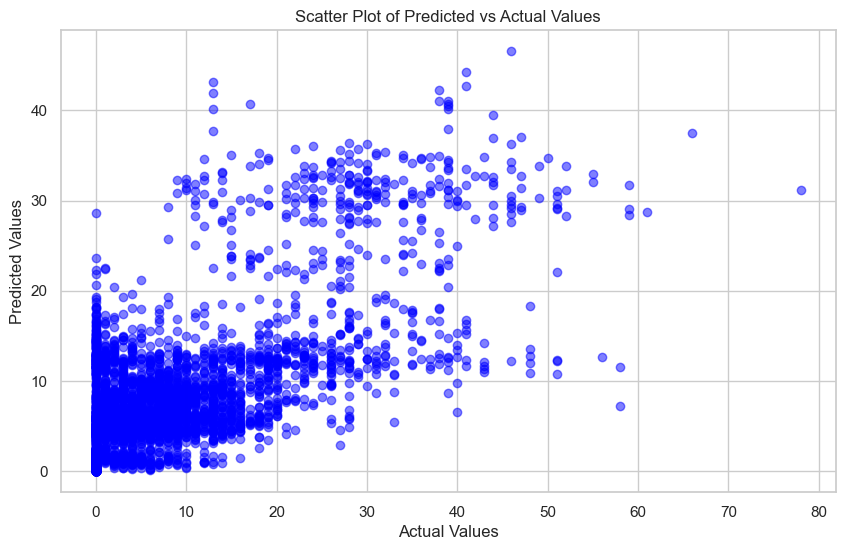

In [215]:
# 7.6 Instead of Confusion matrix  creating scatter plot because the data is continuous 
import matplotlib.pyplot as plt

# Assuming 'y_valid' contains the actual target values and 'y_pred' contains the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_valid, y_pred, color='blue', alpha=0.5)
plt.title("Scatter Plot of Predicted vs Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

##### **Interpretation**

y_valid contains the true target values from your validation set, and y_pred contain the predicted values from the model. 

The scatter plot should ideally show how well the model's predictions align with the actual values and the points should fall along a diagonal line, indicating that the predictions closely match the actual values. This is the what we see in the graph as well. Thus, we can conclude that the model is working fine. 

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Residual Plot')

Text(0.5, 0, 'Predicted Values')

Text(0, 0.5, 'Residuals (Actual - Predicted)')

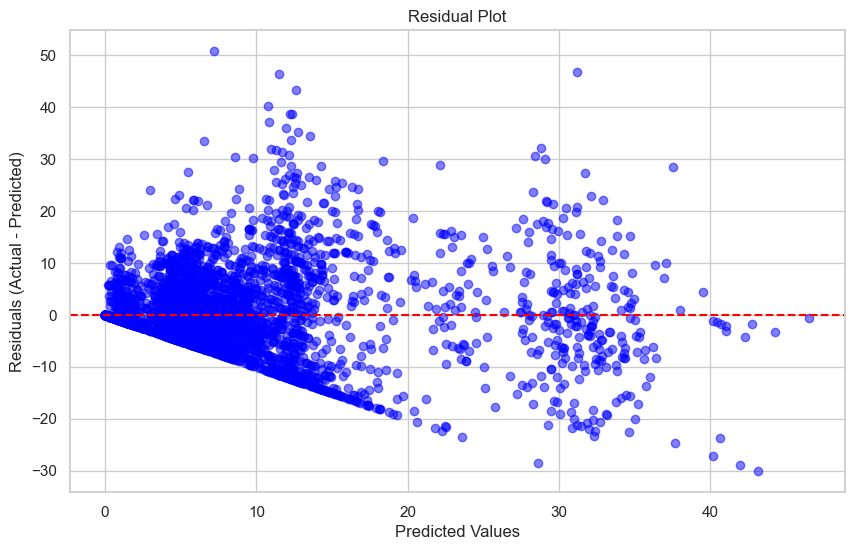

In [216]:
import matplotlib.pyplot as plt

# Assuming 'y_valid' contains the actual target values and 'y_pred' contains the predicted values
residuals = y_valid - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.show()


##### **Interpretation**

Ideally, the residuals should be randomly scattered around the horizontal line at y=0. If there's a clear pattern or trend in the residuals (e.g., a curve or systematic increase/decrease), it might indicate that your model is not capturing certain patterns in the data. The red dashed line at y=0 represents where the residuals would be if the predictions were perfect.

#### FEATURE IMPORTANCE

In [217]:
# Assuming 'clf' is your trained GridSearchCV object and 'best_rf_model' is the best RandomForestRegressor model
best_rf_model = clf.best_estimator_

# Access feature importances
feature_importances = best_rf_model.feature_importances_

# Print the number of features and the feature importances
print("Number of features:", feature_importances.shape[0])
print("Feature importances:", feature_importances)   


Number of features: 4
Feature importances: [0.1401334  0.51417705 0.14254043 0.20314912]


In [218]:
colnames = X.columns.tolist()
imp_values = feature_importances
df_imp = pd.DataFrame(data=imp_values, 
                     index = colnames,
                     columns =["imp"]).sort_values(by ='imp')
df_imp

,imp
visit_month,0.140133
UniProt,0.142540
NPX,0.203149
upd23b_clinical_state_on_medication,0.514177


In [219]:
# 7.11 First five columns with least feature importance are:
list(df_imp.index.values[:5])

['visit_month', 'UniProt', 'NPX', 'upd23b_clinical_state_on_medication']

##### **Interpretation**

Each feature's importance value represents the proportion of the model's prediction error that can be attributed to that feature. A higher importance value suggests that the feature has a stronger impact on the model's predictions. Here's how to interpret the specific feature importances you've provided:

visit_month: Importance - 0.140133
This feature has an importance value of approximately 0.14. This suggests that it contributes a moderate amount to the model's predictions. It's not the most influential feature, but it still plays a role in making predictions.

UniProt: Importance - 0.142540
Similarly, this feature has an importance value of approximately 0.14. It also contributes a moderate amount to the model's predictions.

NPX: Importance - 0.203149
This feature has the highest importance value among the ones you've listed, with approximately 0.20. This indicates that it has a notable impact on the model's predictions.

upd23b_clinical_state_on_medication: Importance - 0.514177
This feature has the highest importance value of all, with approximately 0.51. This implies that it is the most influential feature in your model's predictions.

Overall, the feature importances highlight the relative contributions of each feature in explaining the variations in the target variable. It's important to note that feature importances are specific to the model you're using and the dataset you have. Different models or datasets might yield different importance rankings. If you're looking to simplify your model or make it more interpretable, you might consider focusing on the most important features while possibly removing or de-prioritizing the less important ones.







_The End_